# Reintroduction to Pandas

Use this notebook if you are feeling uncomfortable with Python and/or Pandas.

I recommend starting with ["10 Minutes to Pandas"](https://pandas.pydata.org/docs/user_guide/10min.html), and then exploring the links listed on [this page](https://pandas.pydata.org/docs/user_guide/index.html). Most of the sections are fairly short, so don't be intimidated by the long links.

In [3]:
import pandas as pd

In [4]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [57]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [58]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.311309,-1.228416,-0.092777,-0.853501
2013-01-02,-2.420793,0.879023,0.221862,0.622111
2013-01-03,-0.728453,1.068440,-0.602007,0.194340
2013-01-04,-0.667888,0.387729,0.194980,-0.198448
2013-01-05,0.256233,1.697769,0.142432,0.012060
2013-01-06,0.374881,-1.258844,-0.680260,-1.530428


In [19]:
df2 = pd.DataFrame(
     {
         "A": 1.0,
        "B": pd.Timestamp("20130102"),
       "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
     }
 )

print(df2)
df2.dtypes

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [25]:
print(df.head()) #view top of dataframe
print(df.tail()) #view bottom of df

                   A         B         C         D
2013-01-01 -1.413632 -0.100221  0.072191  0.377471
2013-01-02 -0.830174 -1.704367  1.193397 -0.552784
2013-01-03  1.217297  0.715236  0.325624  1.544459
2013-01-04  2.987182  0.146859  0.974413 -0.484798
                   A         B         C         D
2013-01-01 -1.413632 -0.100221  0.072191  0.377471
2013-01-02 -0.830174 -1.704367  1.193397 -0.552784
2013-01-03  1.217297  0.715236  0.325624  1.544459
2013-01-04  2.987182  0.146859  0.974413 -0.484798


In [26]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04'], dtype='datetime64[ns]', freq='D')

In [27]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [28]:
df.to_numpy()

array([[-1.41363172, -0.1002208 ,  0.07219104,  0.37747097],
       [-0.83017397, -1.70436662,  1.19339749, -0.55278428],
       [ 1.21729669,  0.71523593,  0.32562351,  1.54445858],
       [ 2.98718224,  0.14685855,  0.97441273, -0.48479799]])

In [29]:
df.describe()

,A,B,C,D
count,4.000000,4.000000,4.000000,4.000000
mean,0.490168,-0.235623,0.641406,0.221087
std,2.010933,1.036977,0.528934,0.978591
min,-1.413632,-1.704367,0.072191,-0.552784
25%,-0.976038,-0.501257,0.262265,-0.501795
50%,0.193561,0.023319,0.650018,-0.053664
75%,1.659768,0.288953,1.029159,0.669218
max,2.987182,0.715236,1.193397,1.544459


In [31]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04
A,-1.413632,-0.830174,1.217297,2.987182
B,-0.100221,-1.704367,0.715236,0.146859
C,0.072191,1.193397,0.325624,0.974413
D,0.377471,-0.552784,1.544459,-0.484798


In [32]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.377471,0.072191,-0.100221,-1.413632
2013-01-02,-0.552784,1.193397,-1.704367,-0.830174
2013-01-03,1.544459,0.325624,0.715236,1.217297
2013-01-04,-0.484798,0.974413,0.146859,2.987182


In [33]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,-0.830174,-1.704367,1.193397,-0.552784
2013-01-01,-1.413632,-0.100221,0.072191,0.377471
2013-01-04,2.987182,0.146859,0.974413,-0.484798
2013-01-03,1.217297,0.715236,0.325624,1.544459


In [ ]:
df["A"]
#For a DataFrame, passing a single label selects a 
#columns and yields a Series equivalent to df.A:

2013-01-01   -1.413632
2013-01-02   -0.830174
2013-01-03    1.217297
2013-01-04    2.987182
Freq: D, Name: A, dtype: float64

In [59]:
print(df)
df[0:3]
df["20130102":"20130104"]
df.loc[dates[0]]
df.loc[:, ["A", "B"]]
df.loc["20130102":"20130104", ["A", "B"]]
df.loc[dates[0], "A"]
df.at[dates[0], "A"]

                   A         B         C         D
2013-01-01  1.311309 -1.228416 -0.092777 -0.853501
2013-01-02 -2.420793  0.879023  0.221862  0.622111
2013-01-03 -0.728453  1.068440 -0.602007  0.194340
2013-01-04 -0.667888  0.387729  0.194980 -0.198448
2013-01-05  0.256233  1.697769  0.142432  0.012060
2013-01-06  0.374881 -1.258844 -0.680260 -1.530428


np.float64(1.311309146714077)

In [65]:
df.iloc[2]

A   -0.728453
B    1.068440
C   -0.602007
D    0.194340
Name: 2013-01-03 00:00:00, dtype: float64

In [64]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.667888,0.387729
2013-01-05,0.256233,1.697769


In [66]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-2.420793,0.221862
2013-01-03,-0.728453,-0.602007
2013-01-05,0.256233,0.142432


In [67]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-2.420793,0.879023,0.221862,0.622111
2013-01-03,-0.728453,1.068440,-0.602007,0.194340


In [69]:
df.iloc[1, 1]
#or
df.iat[1, 1]

np.float64(0.8790230171875809)

In [70]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.311309,-1.228416,-0.092777,-0.853501
2013-01-05,0.256233,1.697769,0.142432,0.012060
2013-01-06,0.374881,-1.258844,-0.680260,-1.530428


In [71]:
df[df > 0]

,A,B,C,D
2013-01-01,1.311309,NaN,NaN,NaN
2013-01-02,NaN,0.879023,0.221862,0.622111
2013-01-03,NaN,1.068440,NaN,0.194340
2013-01-04,NaN,0.387729,0.194980,NaN
2013-01-05,0.256233,1.697769,0.142432,0.012060
2013-01-06,0.374881,NaN,NaN,NaN


In [72]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,1.311309,-1.228416,-0.092777,-0.853501,one
2013-01-02,-2.420793,0.879023,0.221862,0.622111,one
2013-01-03,-0.728453,1.068440,-0.602007,0.194340,two
2013-01-04,-0.667888,0.387729,0.194980,-0.198448,three
2013-01-05,0.256233,1.697769,0.142432,0.012060,four
2013-01-06,0.374881,-1.258844,-0.680260,-1.530428,three


In [74]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.728453,1.068440,-0.602007,0.19434,two
2013-01-05,0.256233,1.697769,0.142432,0.01206,four


In [78]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1
df["F"] = s1
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [82]:
df

,A,B,C,D,F
2013-01-01,0.000000,-1.228416,-0.092777,-0.853501,NaN
2013-01-02,-2.420793,0.879023,0.221862,0.622111,1.0
2013-01-03,-0.728453,1.068440,-0.602007,0.194340,2.0
2013-01-04,-0.667888,0.387729,0.194980,-0.198448,3.0
2013-01-05,0.256233,1.697769,0.142432,0.012060,4.0
2013-01-06,0.374881,-1.258844,-0.680260,-1.530428,5.0


In [85]:
df.at[dates[0], "A"] = 0
df.iat[0, 1] = 0
df.loc[:, "D"] = np.array([5] * len(df))

df


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.092777,5.0,NaN
2013-01-02,-2.420793,0.879023,0.221862,5.0,1.0
2013-01-03,-0.728453,1.068440,-0.602007,5.0,2.0
2013-01-04,-0.667888,0.387729,0.194980,5.0,3.0
2013-01-05,0.256233,1.697769,0.142432,5.0,4.0
2013-01-06,0.374881,-1.258844,-0.680260,5.0,5.0


In [86]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.092777,-5.0,NaN
2013-01-02,-2.420793,-0.879023,-0.221862,-5.0,-1.0
2013-01-03,-0.728453,-1.068440,-0.602007,-5.0,-2.0
2013-01-04,-0.667888,-0.387729,-0.194980,-5.0,-3.0
2013-01-05,-0.256233,-1.697769,-0.142432,-5.0,-4.0
2013-01-06,-0.374881,-1.258844,-0.680260,-5.0,-5.0


In [88]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.092777,5.0,NaN
2013-01-02,-2.420793,0.879023,0.221862,5.0,1.0
2013-01-03,-0.728453,1.068440,-0.602007,5.0,2.0
2013-01-04,-0.667888,0.387729,0.194980,5.0,3.0
2013-01-05,0.256233,1.697769,0.142432,5.0,4.0
2013-01-06,0.374881,-1.258844,-0.680260,5.0,5.0


In [87]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.092777,5.0,NaN,1.0
2013-01-02,-2.420793,0.879023,0.221862,5.0,1.0,1.0
2013-01-03,-0.728453,1.068440,-0.602007,5.0,2.0,NaN
2013-01-04,-0.667888,0.387729,0.194980,5.0,3.0,NaN


In [90]:
df1.dropna(how="any")
#gets rid of rows with missing data


,A,B,C,D,F,E
2013-01-02,-2.420793,0.879023,0.221862,5.0,1.0,1.0


In [91]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.092777,5.0,5.0,1.0
2013-01-02,-2.420793,0.879023,0.221862,5.0,1.0,1.0
2013-01-03,-0.728453,1.068440,-0.602007,5.0,2.0,5.0
2013-01-04,-0.667888,0.387729,0.194980,5.0,3.0,5.0


In [92]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [ ]:
df.mean()
#mean for each column

A   -0.531003
B    0.462353
C   -0.135962
D    5.000000
F    3.000000
dtype: float64

In [94]:
df.mean(axis=1)
#mean for each row

2013-01-01    1.226806
2013-01-02    0.936018
2013-01-03    1.347596
2013-01-04    1.582964
2013-01-05    2.219287
2013-01-06    1.687155
Freq: D, dtype: float64

In [95]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [97]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.092777,5.0,NaN
2013-01-02,-2.420793,0.879023,0.221862,5.0,1.0
2013-01-03,-0.728453,1.068440,-0.602007,5.0,2.0
2013-01-04,-0.667888,0.387729,0.194980,5.0,3.0
2013-01-05,0.256233,1.697769,0.142432,5.0,4.0
2013-01-06,0.374881,-1.258844,-0.680260,5.0,5.0


In [96]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.728453,0.068440,-1.602007,4.0,1.0
2013-01-04,-3.667888,-2.612271,-2.805020,2.0,0.0
2013-01-05,-4.743767,-3.302231,-4.857568,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [99]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.092777,5.0,NaN
2013-01-02,-2.420793,0.879023,0.221862,5.0,1.0
2013-01-03,-0.728453,1.068440,-0.602007,5.0,2.0
2013-01-04,-0.667888,0.387729,0.194980,5.0,3.0
2013-01-05,0.256233,1.697769,0.142432,5.0,4.0
2013-01-06,0.374881,-1.258844,-0.680260,5.0,5.0


In [98]:
df.agg(lambda x: np.mean(x) * 5.6)

A    -2.973619
B     2.589177
C    -0.761385
D    28.000000
F    16.800000
dtype: float64

In [100]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-9.389049,506.0,NaN
2013-01-02,-244.984288,88.957129,22.452478,506.0,101.2
2013-01-03,-73.719417,108.126156,-60.923061,506.0,202.4
2013-01-04,-67.590271,39.238198,19.731992,506.0,303.6
2013-01-05,25.930789,171.814218,14.414132,506.0,404.8
2013-01-06,37.937945,-127.394972,-68.842342,506.0,506.0


In [101]:
s = pd.Series(np.random.randint(0, 7, size=10))

s

0    1
1    6
2    1
3    3
4    2
5    4
6    6
7    6
8    4
9    5
dtype: int64

In [102]:
s.value_counts()

6    3
1    2
4    2
3    1
2    1
5    1
Name: count, dtype: int64

In [103]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [108]:
df = pd.DataFrame(np.random.randn(10, 4))

df



,0,1,2,3
0,-0.409249,0.705661,1.491055,0.212210
1,0.163456,0.326695,0.173671,-0.247570
2,0.463225,0.713681,-0.074655,-1.864125
3,-1.296439,0.098833,-1.165282,-0.410044
4,-2.470121,0.975757,0.405642,-0.075169
5,-0.019128,-0.859218,-0.319121,0.978956
6,-0.626031,0.004116,1.146705,0.761874
7,-1.335699,-0.513278,-0.353859,0.079790
8,-0.653541,0.527519,1.624996,0.795360
9,1.773674,-0.184221,0.256947,-1.164833


In [111]:
# break it into pieces
#i dont understand what this does
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)


,0,1,2,3
0,-0.409249,0.705661,1.491055,0.212210
1,0.163456,0.326695,0.173671,-0.247570
2,0.463225,0.713681,-0.074655,-1.864125
3,-1.296439,0.098833,-1.165282,-0.410044
4,-2.470121,0.975757,0.405642,-0.075169
5,-0.019128,-0.859218,-0.319121,0.978956
6,-0.626031,0.004116,1.146705,0.761874
7,-1.335699,-0.513278,-0.353859,0.079790
8,-0.653541,0.527519,1.624996,0.795360
9,1.773674,-0.184221,0.256947,-1.164833


In [114]:
print(df)
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

left

          0         1         2         3
0 -0.409249  0.705661  1.491055  0.212210
1  0.163456  0.326695  0.173671 -0.247570
2  0.463225  0.713681 -0.074655 -1.864125
3 -1.296439  0.098833 -1.165282 -0.410044
4 -2.470121  0.975757  0.405642 -0.075169
5 -0.019128 -0.859218 -0.319121  0.978956
6 -0.626031  0.004116  1.146705  0.761874
7 -1.335699 -0.513278 -0.353859  0.079790
8 -0.653541  0.527519  1.624996  0.795360
9  1.773674 -0.184221  0.256947 -1.164833


,key,lval
0,foo,1
1,foo,2


In [115]:
right

,key,rval
0,foo,4
1,foo,5


In [118]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [120]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

left

right


pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [123]:
import numpy as np

In [124]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df


,A,B,C,D
0,foo,one,1.438762,-1.103919
1,bar,one,2.010458,-0.159960
2,foo,two,0.689404,0.238975
3,bar,three,-0.442582,0.251842
4,foo,two,-1.892541,-1.811898
5,bar,two,0.745044,0.137623
6,foo,one,-1.126264,-0.811287
7,foo,three,1.845810,-0.195715


In [125]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,2.312919,0.229506
foo,0.955171,-3.683844


In [126]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    2.010458 -0.159960
    three -0.442582  0.251842
    two    0.745044  0.137623
foo one    0.312498 -1.915206
    three  1.845810 -0.195715
    two   -1.203137 -1.572923

In [127]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]


index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]

df2

A         B
first second                    
bar   one     1.250097 -1.085555
      two     0.292979  1.236458
baz   one    -1.337785 -0.876548
      two    -1.306065  0.045026

In [130]:
df2

A         B
first second                    
bar   one     1.250097 -1.085555
      two     0.292979  1.236458
baz   one    -1.337785 -0.876548
      two    -1.306065  0.045026

In [129]:
#The stack() method “compresses” a level in the DataFrame’s columns:

stacked = df2.stack(future_stack=True)

stacked

first  second   
bar    one     A    1.250097
               B   -1.085555
       two     A    0.292979
               B    1.236458
baz    one     A   -1.337785
               B   -0.876548
       two     A   -1.306065
               B    0.045026
dtype: float64

In [136]:
stacked.unstack(2)

A         B
first second                    
bar   one     1.250097 -1.085555
      two     0.292979  1.236458
baz   one    -1.337785 -0.876548
      two    -1.306065  0.045026

In [137]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)


df


,A,B,C,D,E
0,one,A,foo,0.241252,0.718569
1,one,B,foo,0.156251,-0.346554
2,two,C,foo,-0.268498,-0.687369
3,three,A,bar,0.560108,-0.869856
4,one,B,bar,0.156020,-1.364361
5,one,C,bar,-0.051206,-0.378069
6,two,A,foo,2.505306,0.986845
7,three,B,foo,-0.957322,2.536572
8,one,C,foo,-0.411438,0.616632
9,one,A,bar,-0.586169,-0.701554


In [138]:
#pivot_table() pivots a DataFrame 
# specifying the values, index and columns
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])




C             bar       foo
A     B                    
one   A -0.586169  0.241252
      B  0.156020  0.156251
      C -0.051206 -0.411438
three A  0.560108       NaN
      B       NaN -0.957322
      C -1.553226       NaN
two   A       NaN  2.505306
      B -1.279255       NaN
      C       NaN -0.268498

In [139]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5Min").sum()


2012-01-01    25701
Freq: 5min, dtype: int64

In [145]:
#Series.tz_localize() localizes a time series to a time zone:


rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts
ts_utc = ts.tz_localize("UTC")
ts_utc

#Series.tz_convert() converts a timezones aware 
# time series to another time zone:
ts_utc.tz_convert("US/Eastern")


2012-03-05 19:00:00-05:00   -0.156693
2012-03-06 19:00:00-05:00   -0.140507
2012-03-07 19:00:00-05:00    0.229699
2012-03-08 19:00:00-05:00    1.440206
2012-03-09 19:00:00-05:00    1.597323
Freq: D, dtype: float64

In [ ]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [149]:
df["raw_grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

In [151]:
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)


df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [152]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [153]:
df.groupby("grade", observed=False).size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

plt.close("all")
#The plt.close method is used to close a figure window:



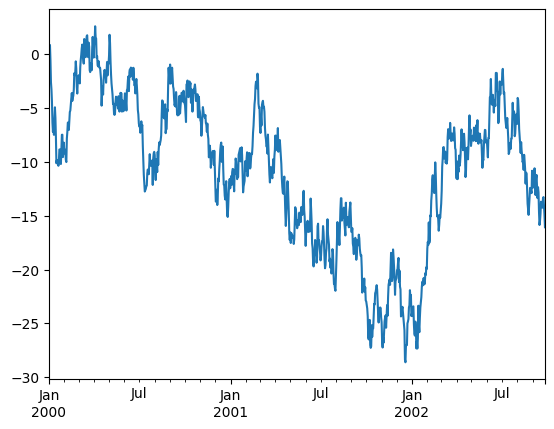

In [155]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

<Figure size 640x480 with 0 Axes>

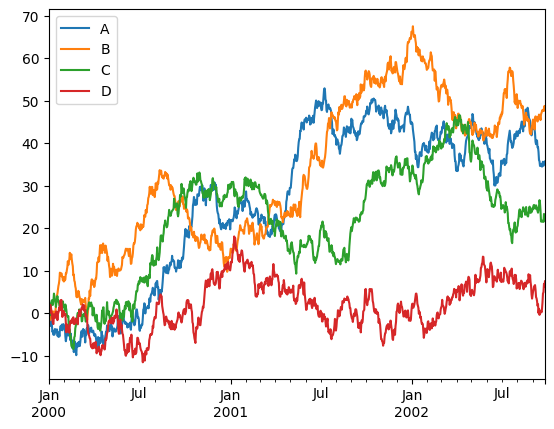

In [157]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');